In [1]:
from federated_learning.utils import SHAPUtil, experiment_util, Visualizer
from federated_learning import ClientPlane, Configuration, ObserverConfiguration
from federated_learning.server import Server
from datetime import datetime
import random

In [ ]:
class ExperimentalSummary():

In [2]:
import numpy as np
def diag_mean_values(shap_values, server_shap = False):
    diag_mean = []
    diag_diff_mean = []
    for row_idx, row in enumerate(shap_values):
        for img_idx, image in enumerate(row):
            if row_idx == img_idx:
                diag_mean.append(np.median(shap_values[row_idx][img_idx][np.nonzero(shap_values[row_idx][img_idx])]))
                if server_shap:
                    arr = np.subtract(image, server_shap[row_idx][img_idx])
                    diag_diff_mean.append(np.median(arr[np.nonzero(arr)]))
    print(diag_mean)
    print(diag_diff_mean)

## Configurations

In [3]:
config = Configuration()
config.FROM_LABEL = 4
config.TO_LABEL = 5
config.POISONED_CLIENTS = 10
data = config.DATASET(config)
shap_util = SHAPUtil(data.test_dataloader)
observer_config = ObserverConfiguration()
visualizer = Visualizer(shap_util)

MNIST training data loaded.
MNIST test data loaded.


## Experimental Setup

In [4]:
server = Server(config, observer_config,data.train_dataloader, data.test_dataloader, shap_util)
client_plane = ClientPlane(config, observer_config, data, shap_util)
client_plane.poison_clients()
clean_idx = experiment_util.select_random_clean(client_plane, config, 10)
poisoned_idx = experiment_util.select_poisoned(client_plane, 10)
print(clean_idx)

Create 200 clients with dataset of size 300
Poison 10/200 clients
Flip 100.0% of the 4 labels to 5
[ 17 182 121 158 187  40 134  86 137  36]
[154, 155, 171, 72, 103, 104, 135, 106, 113, 133]


In [ ]:
#len(client_plane.clients[0].train_dataloader.dataset.dataset.targets[client_plane.clients[0].train_dataloader.dataset.dataset.targets == 5])

## Experiment


Test set: Average loss: 0.0007, Accuracy: 8787/10000 (88%)

Server 1


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.


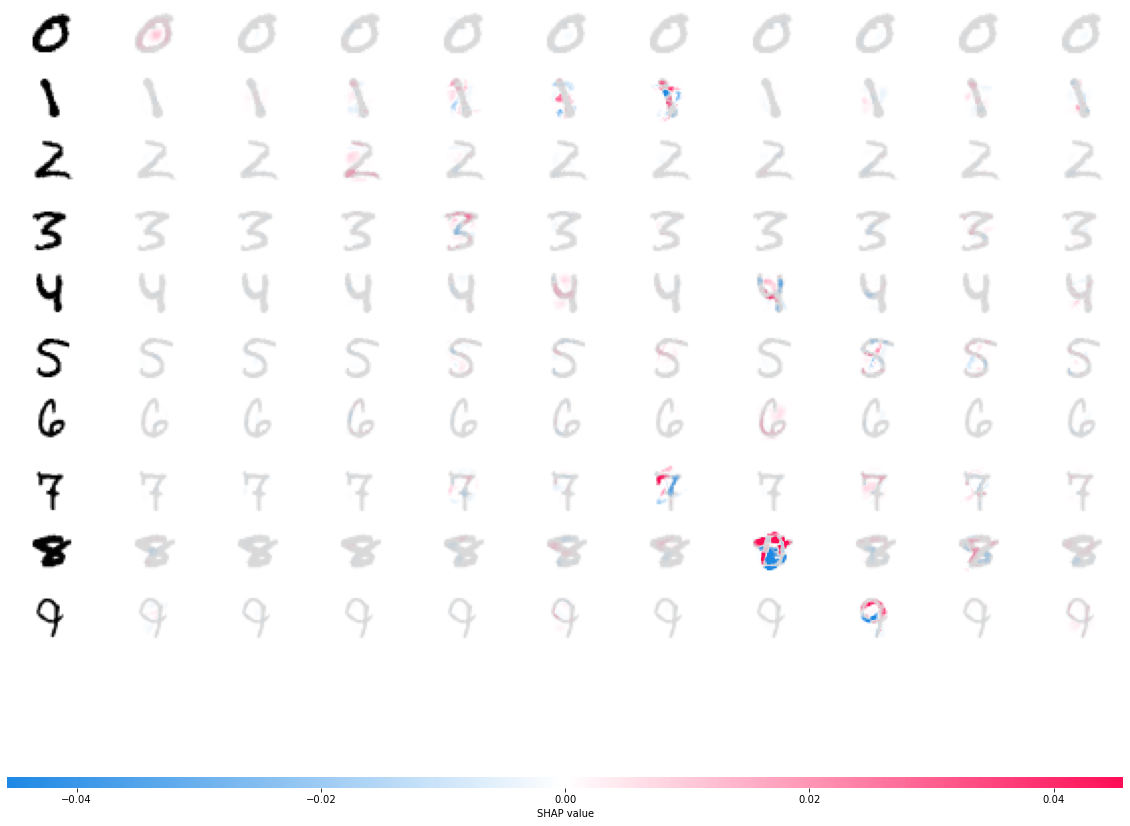

Client Clean 1


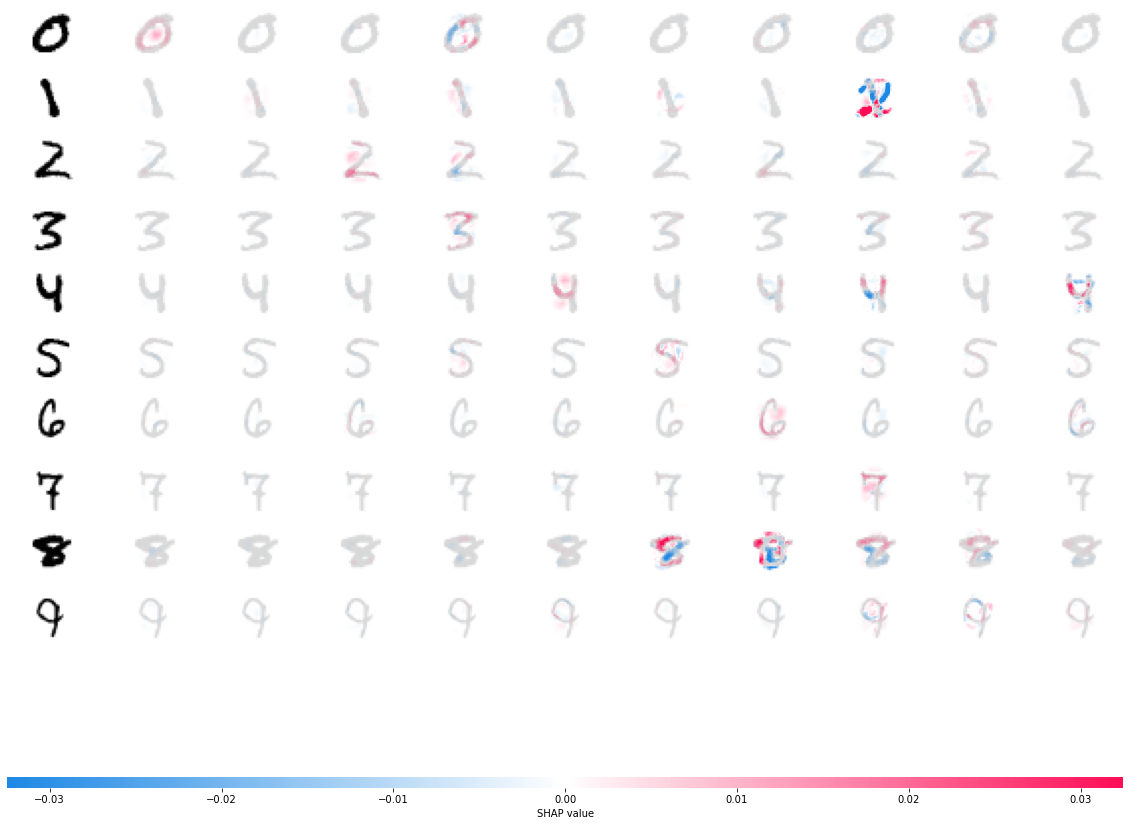

10 10


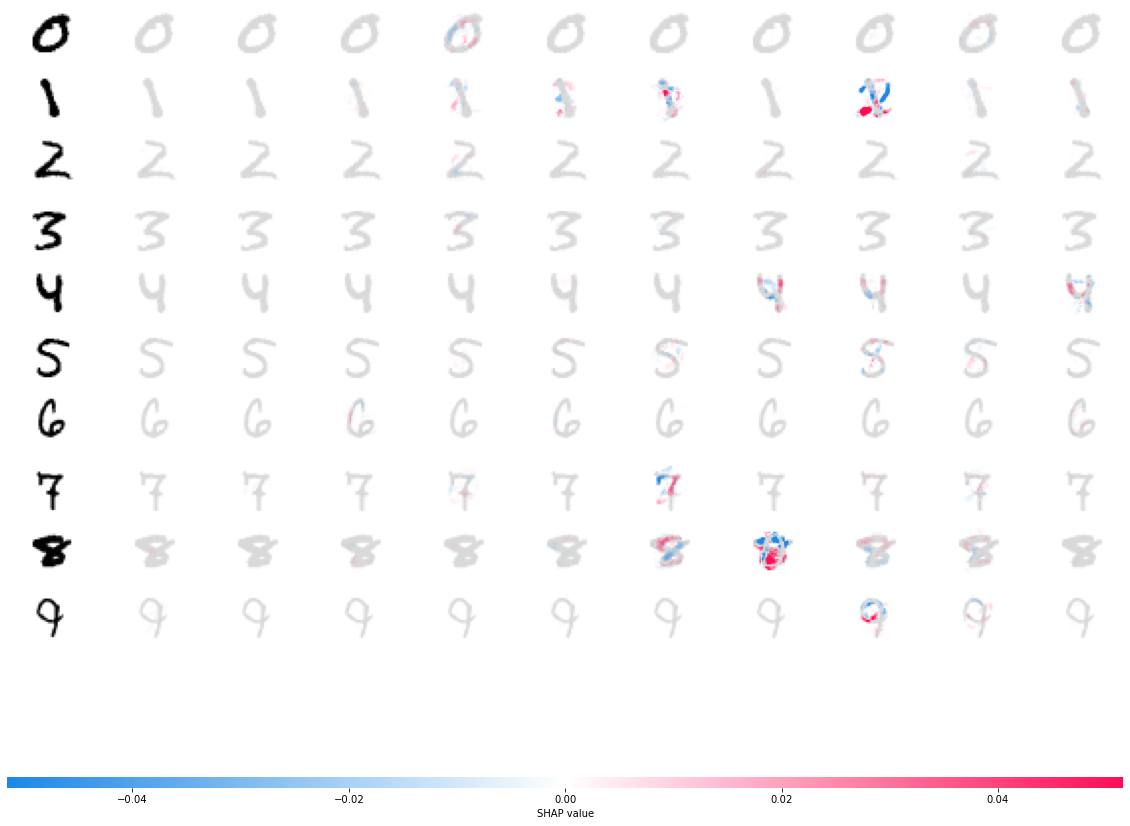

[0.00041964488627854735, 2.95213003482786e-05, 0.00020833993039559573, 4.159899253863841e-05, 0.00016590704035479575, 5.620496449409984e-05, 0.0002287609240738675, 9.629943815525621e-05, 4.140044438827317e-06, 6.0513468270073645e-05]
[-3.6519262458512003e-07, 1.5316862800318631e-06, 9.51600304688327e-06, 1.6833012637107458e-06, 4.038621045765467e-05, 9.411697647010442e-06, 2.42437090491876e-05, 6.0013353504473343e-05, -1.0467333027008863e-06, -3.9396953070536256e-05]
Client Poisoned 1


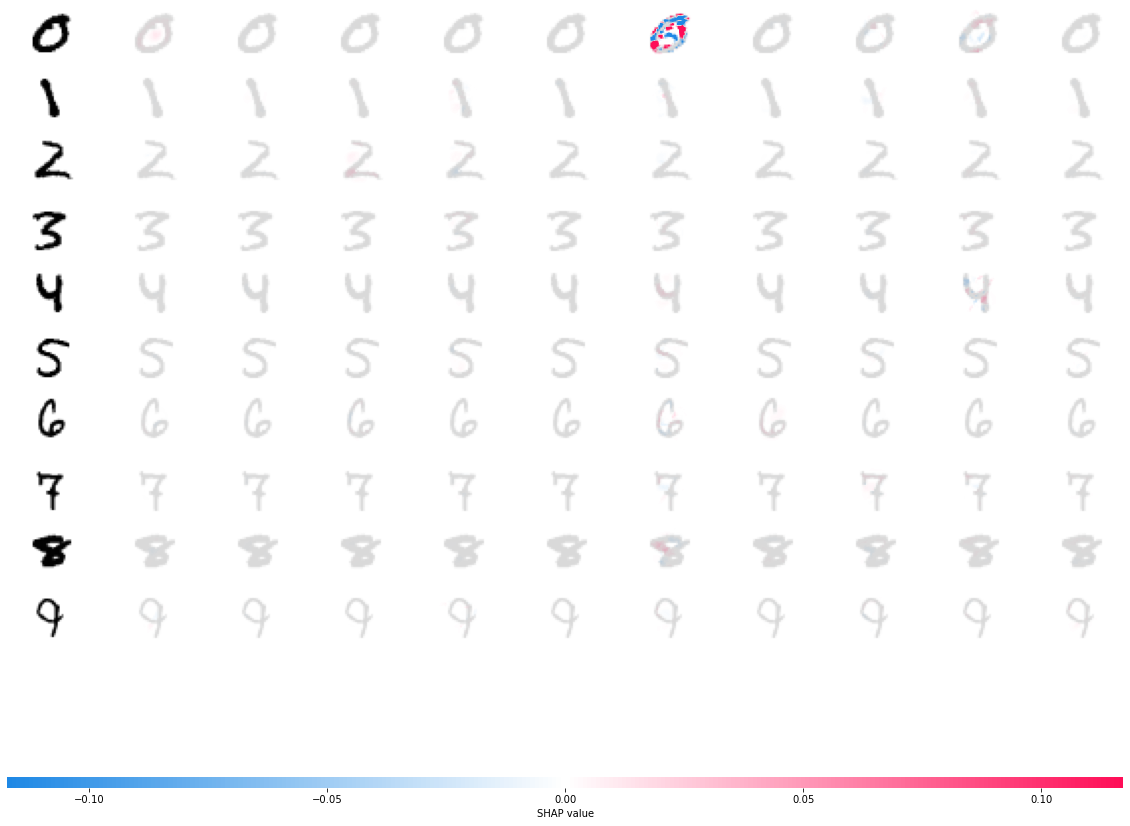

10 10


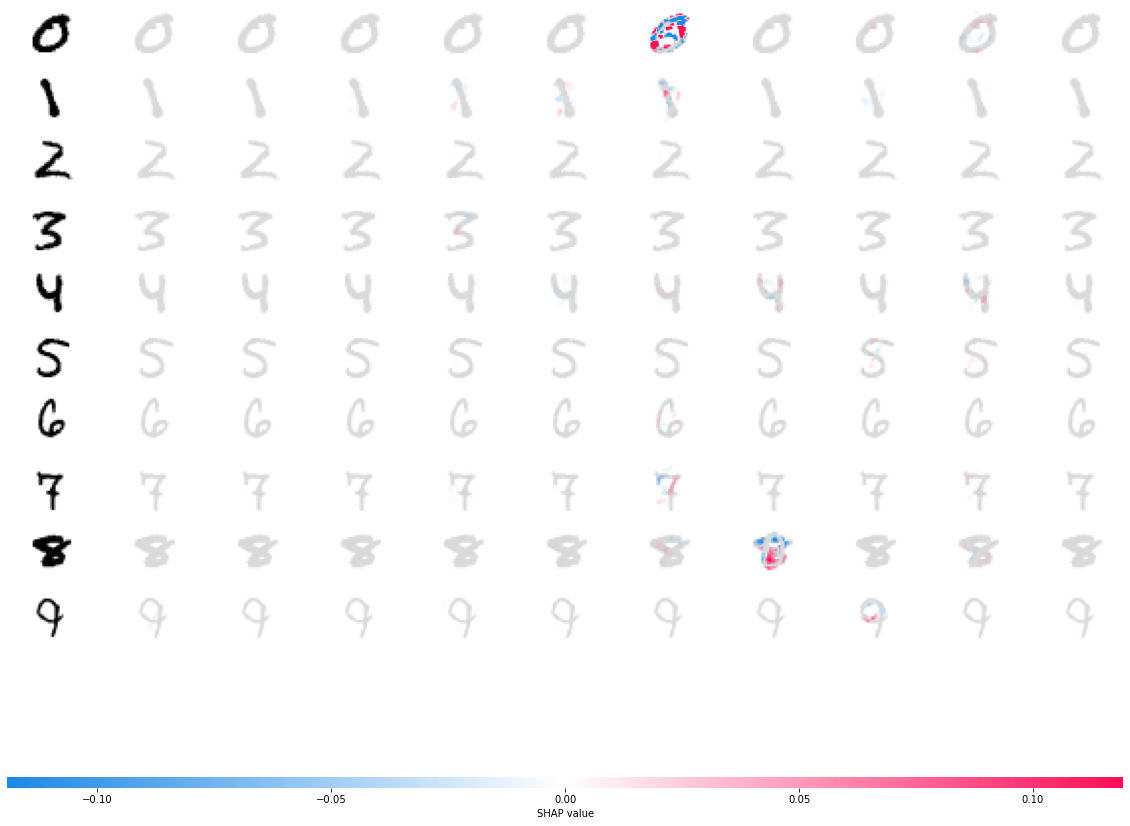

[0.00040991412242874503, 5.375822865971713e-06, 0.00016084537492133677, 3.770360126509331e-05, 3.69386123111326e-06, 1.5671123492211336e-05, 0.00019850334501825273, 2.2529416128236335e-05, 1.3816933460475411e-05, 2.3591366698383354e-05]
[-6.464134472139449e-08, -1.2480265127123857e-05, -2.8699738322757185e-05, -9.480755238655547e-07, -0.00011303822975605726, -8.40071185947977e-08, -1.0303818044121726e-05, -2.1946678316453472e-05, 1.5161573685418261e-06, -3.308938175905496e-05]
Round 1 finished

Test set: Average loss: 0.0007, Accuracy: 8857/10000 (89%)

Server 2


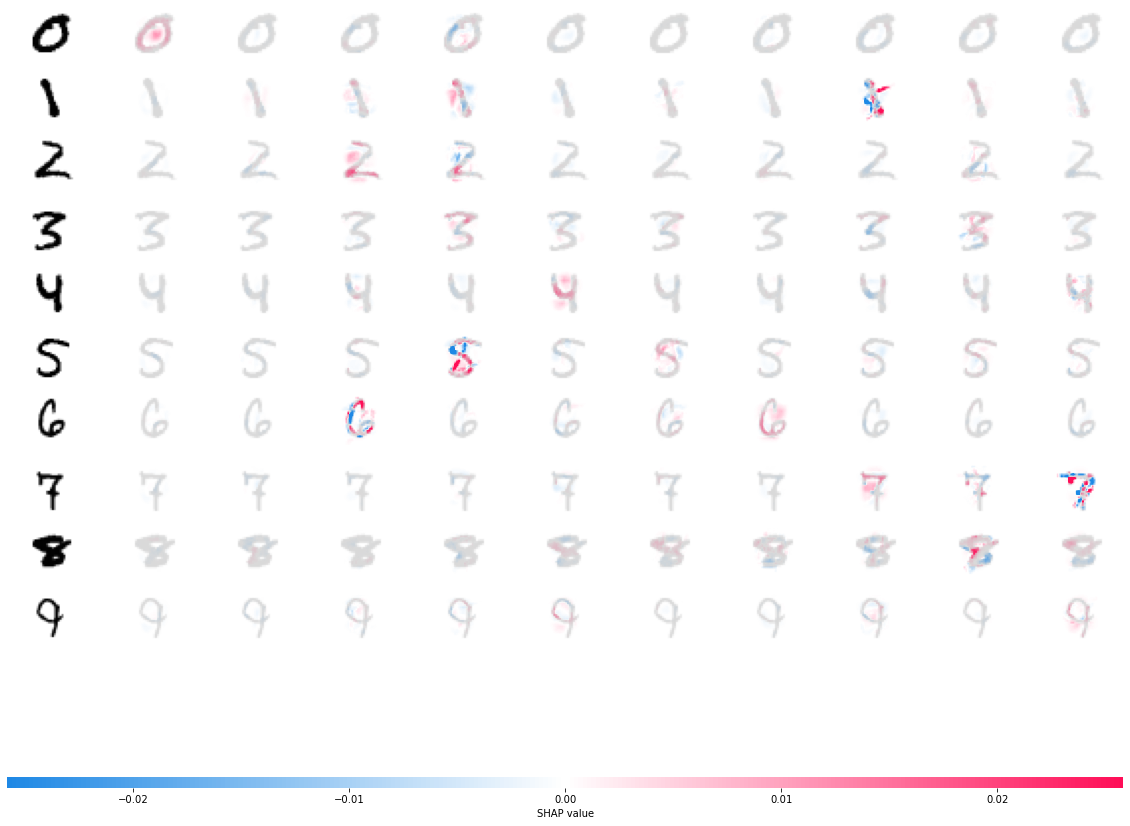

Client Clean 2


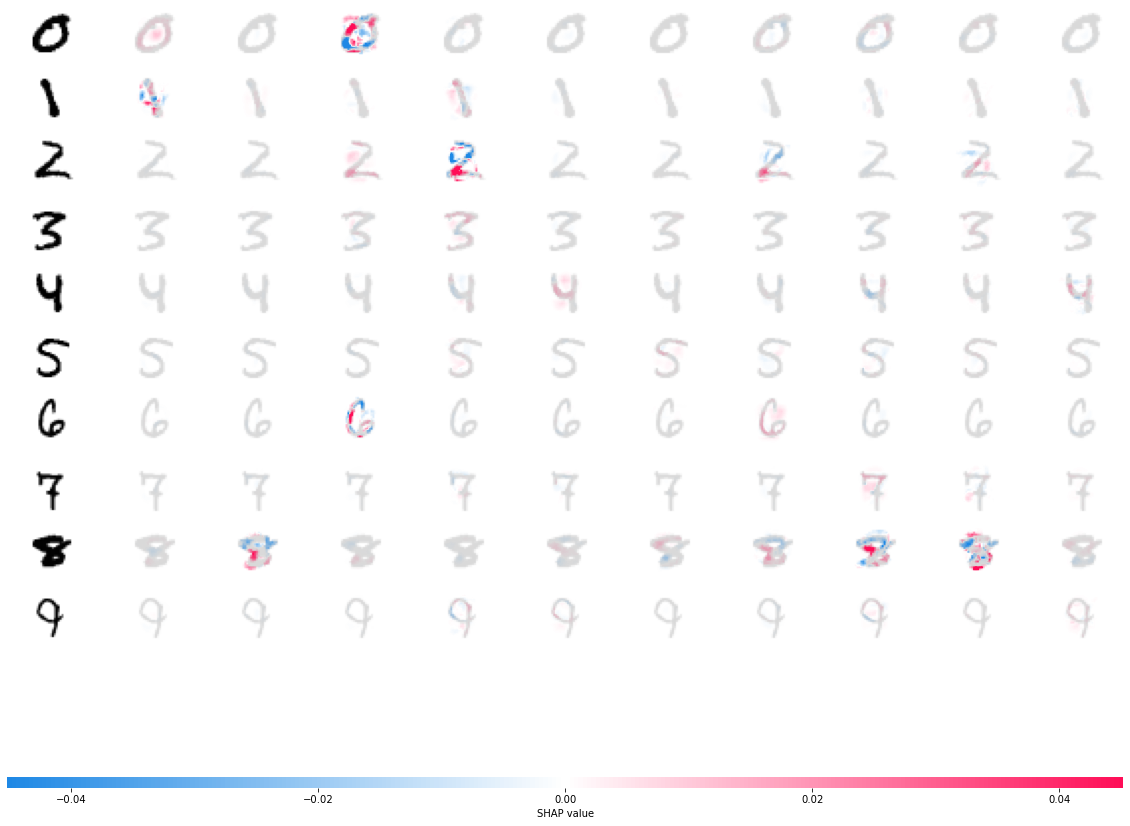

10 10


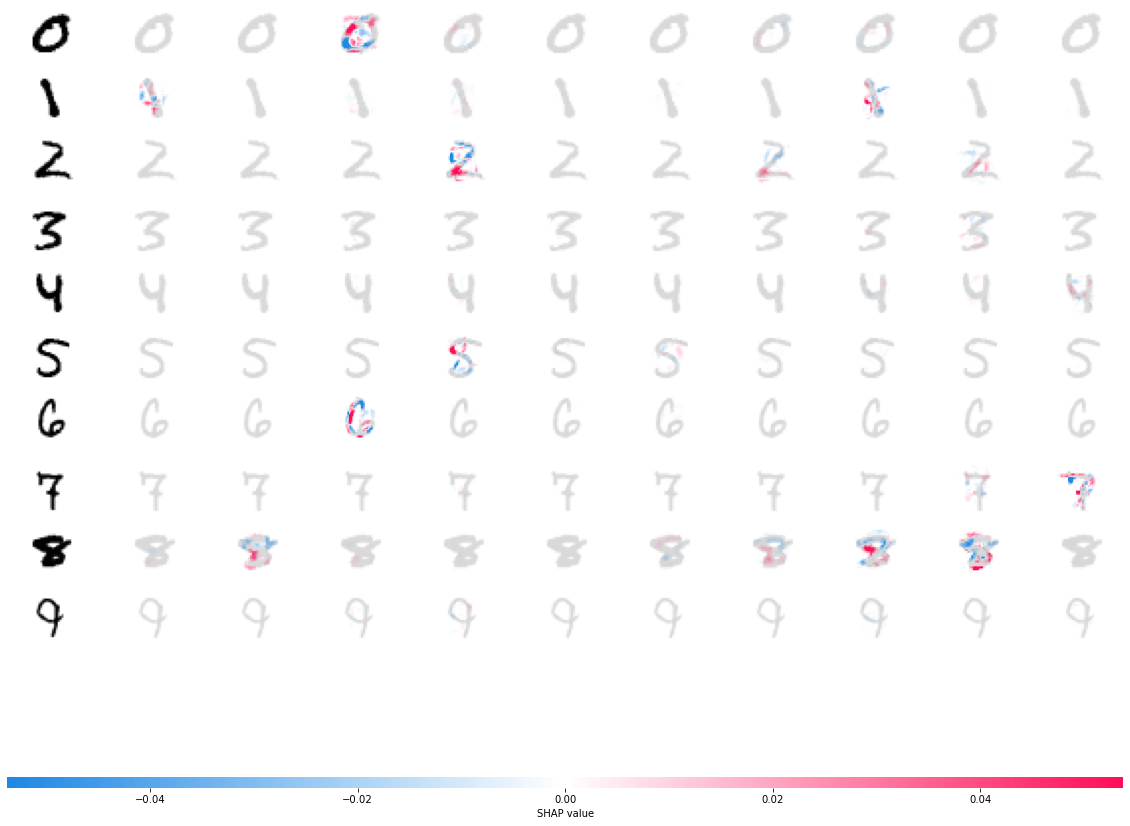

[0.0004042266373289749, 3.13861219183309e-05, 0.0002895997604355216, 6.672251765849069e-05, 0.0001242779107997194, 9.158632019534707e-05, 0.0002228642551926896, 5.475019497680478e-05, 4.7177761643979466e-06, 0.00010322271555196494]
[3.1534364097751677e-07, 1.476205835615474e-05, 3.2382552745957582e-06, 1.2472330126911402e-05, -9.738047083374113e-06, 1.9970215703324357e-08, 5.808395599160576e-06, 1.8092314917339536e-06, -2.142385753245435e-07, -5.072586645837873e-06]
Client Poisoned 2


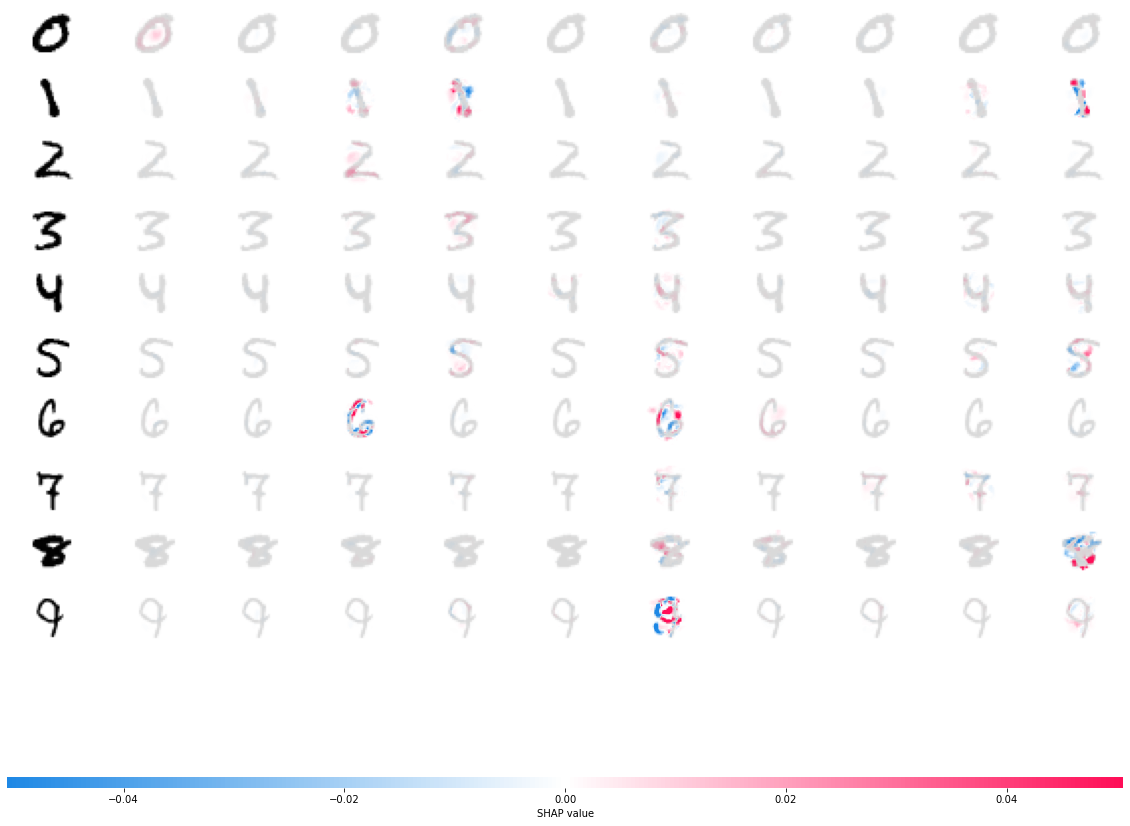

10 10


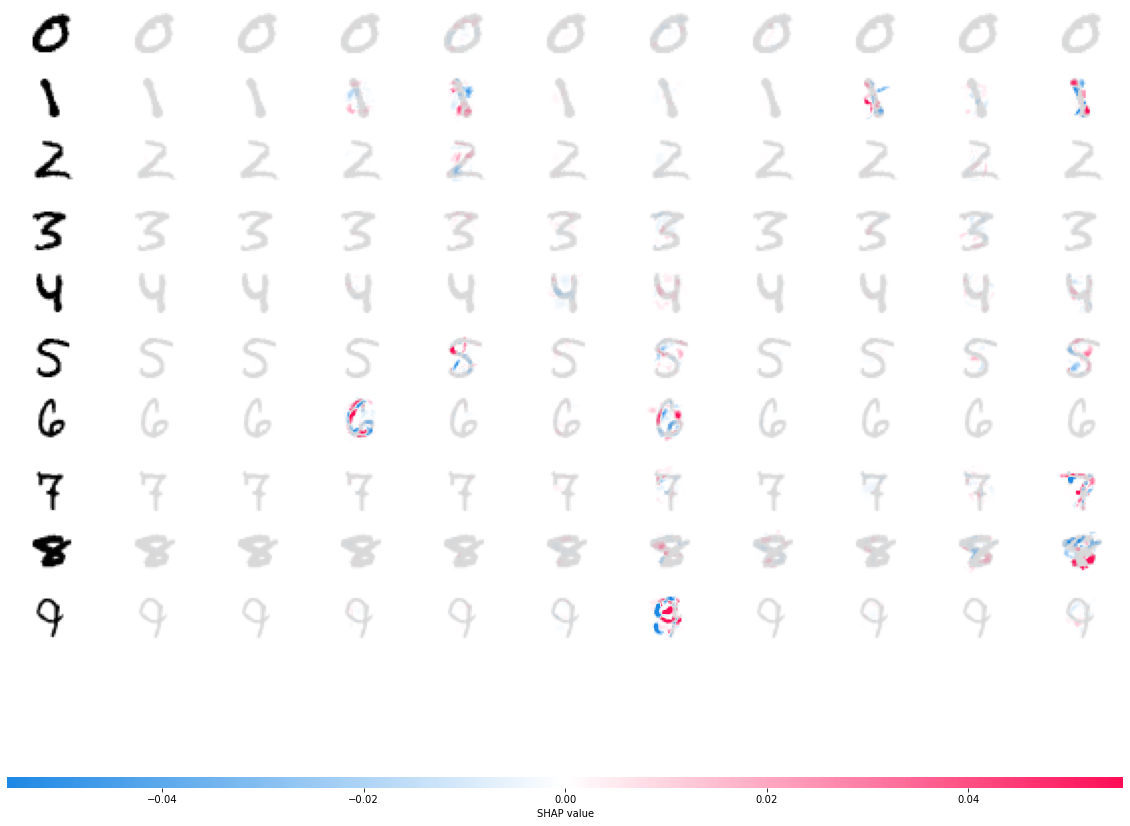

[0.0004752720851683989, 6.053668812455726e-06, 0.00013270738418214023, 9.11807655938901e-05, 1.2405454071995337e-05, 2.1184819161135238e-05, 0.00014387389819603413, 2.0433692952792626e-05, 4.813432269656914e-06, 2.715302525757579e-05]
[-4.361216099368903e-07, -5.292106607157621e-06, -2.531116479076445e-06, 8.358580362255452e-05, -0.00012392364071445172, 2.2774664785174537e-06, -5.12759797857143e-05, -2.6070627427543513e-05, -2.160402226536462e-05, 1.7410124897310197e-08]
Round 2 finished

Test set: Average loss: 0.0006, Accuracy: 8837/10000 (88%)

Server 3


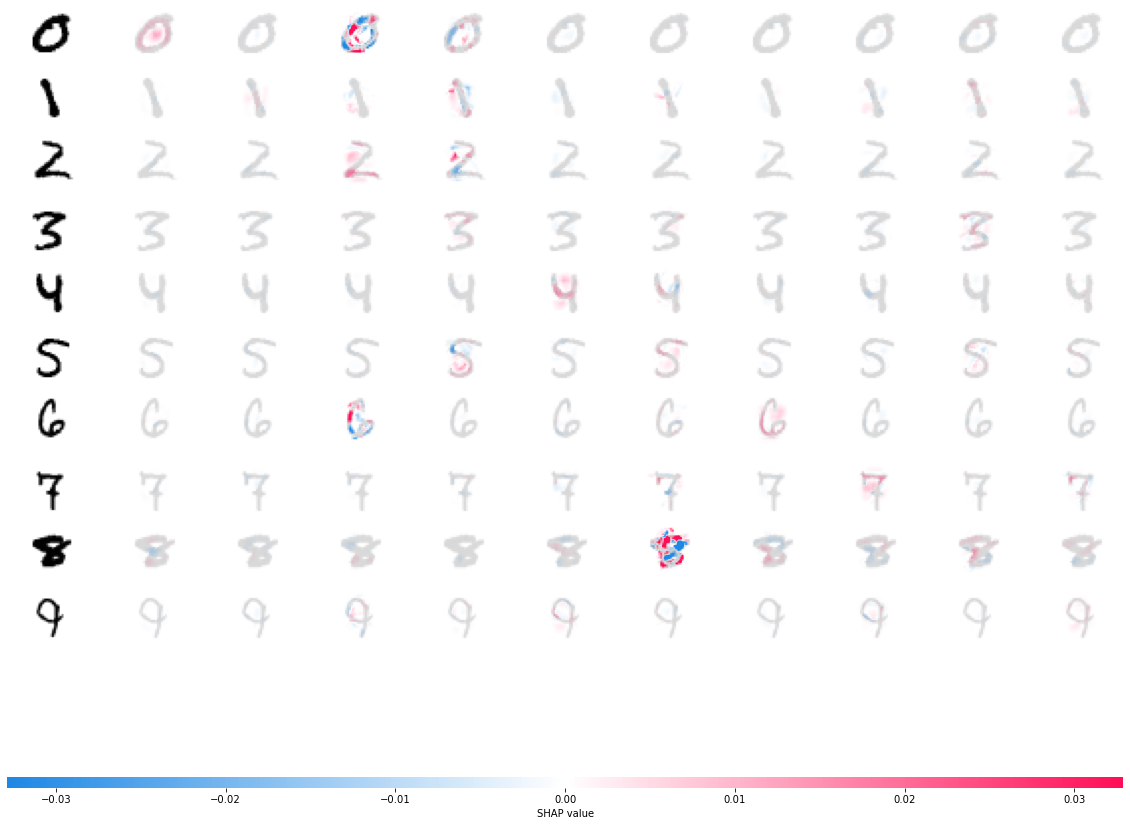

Client Clean 3


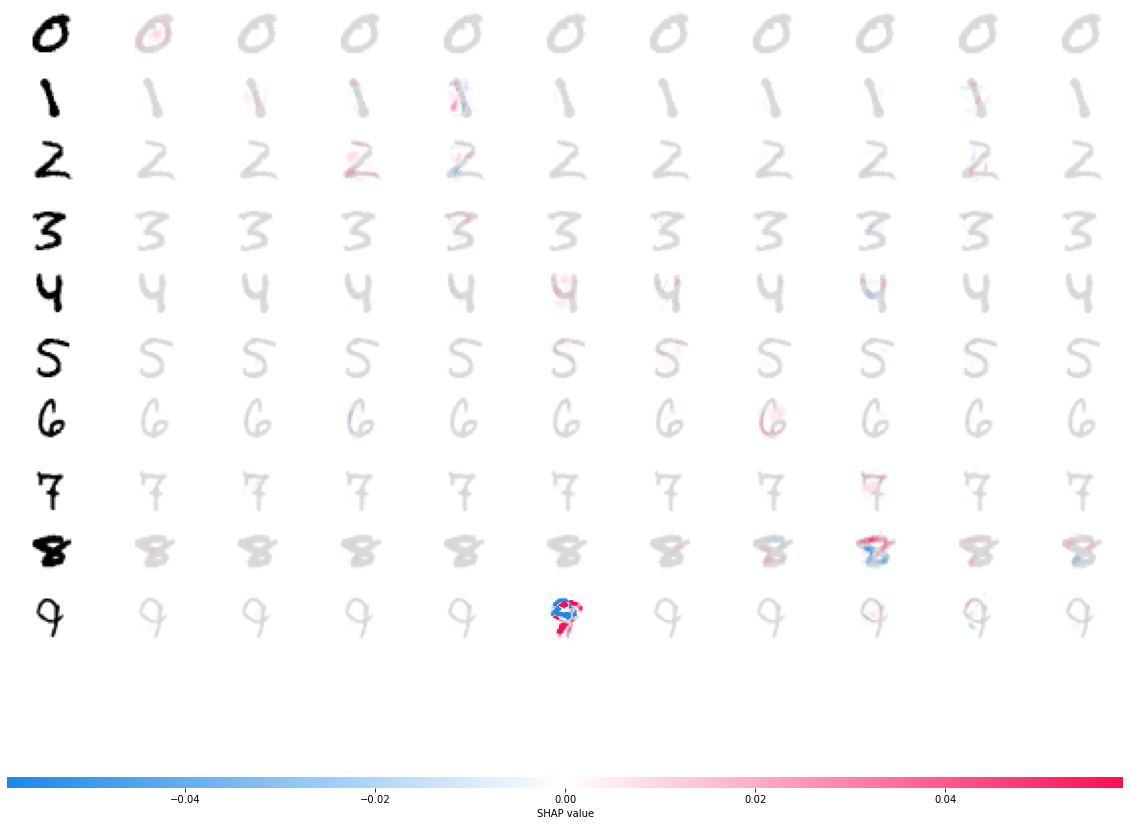

10 10


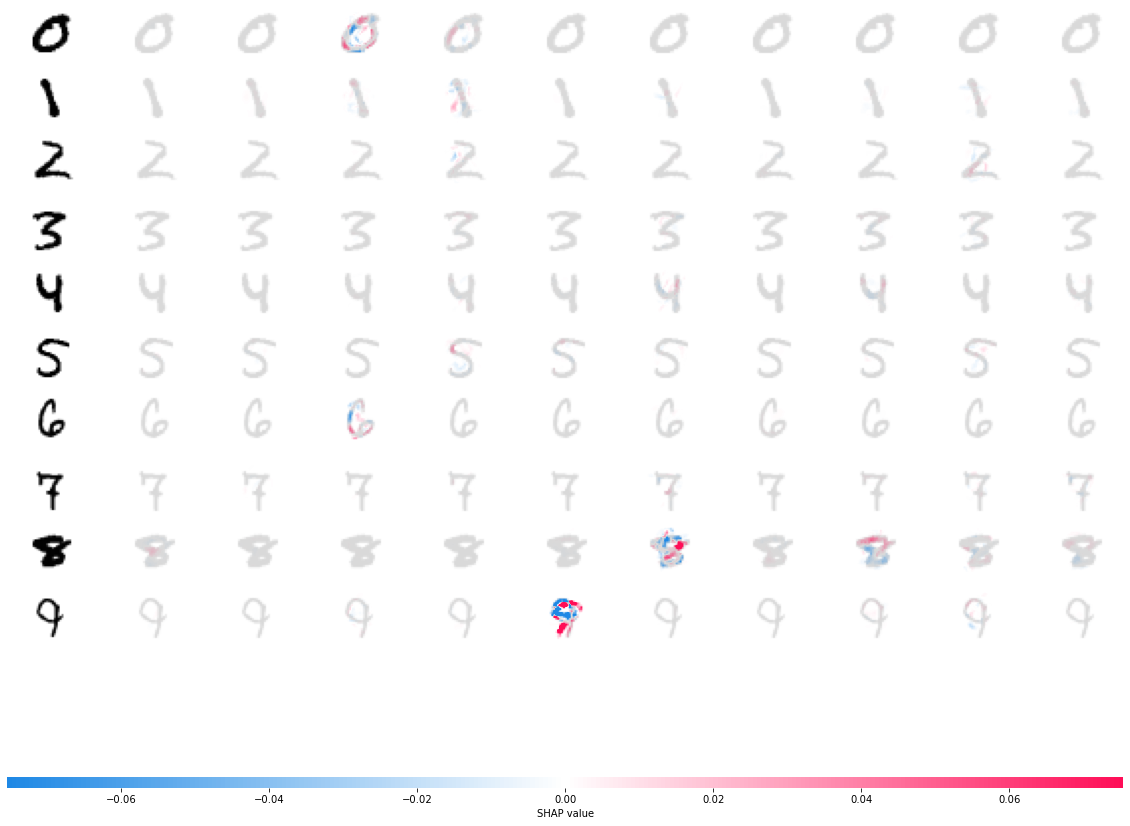

[0.0004441349155968055, 6.243307689146604e-05, 0.0002793664170894772, 3.265986742917448e-05, 0.00016423054330516607, 0.00012744390551233664, 0.00028261341503821313, 9.670948566053994e-05, 3.4140622346967575e-06, 0.00011026448555639945]
[8.5743252498105e-09, 4.3180065404158086e-05, 3.3943524613277987e-06, 9.871817383100279e-06, -7.265713009019237e-08, -6.8797837116107985e-06, 1.6707506347302115e-05, 3.5031893276027404e-05, -1.1381092690498917e-06, -3.7121095033398888e-06]
Client Poisoned 3


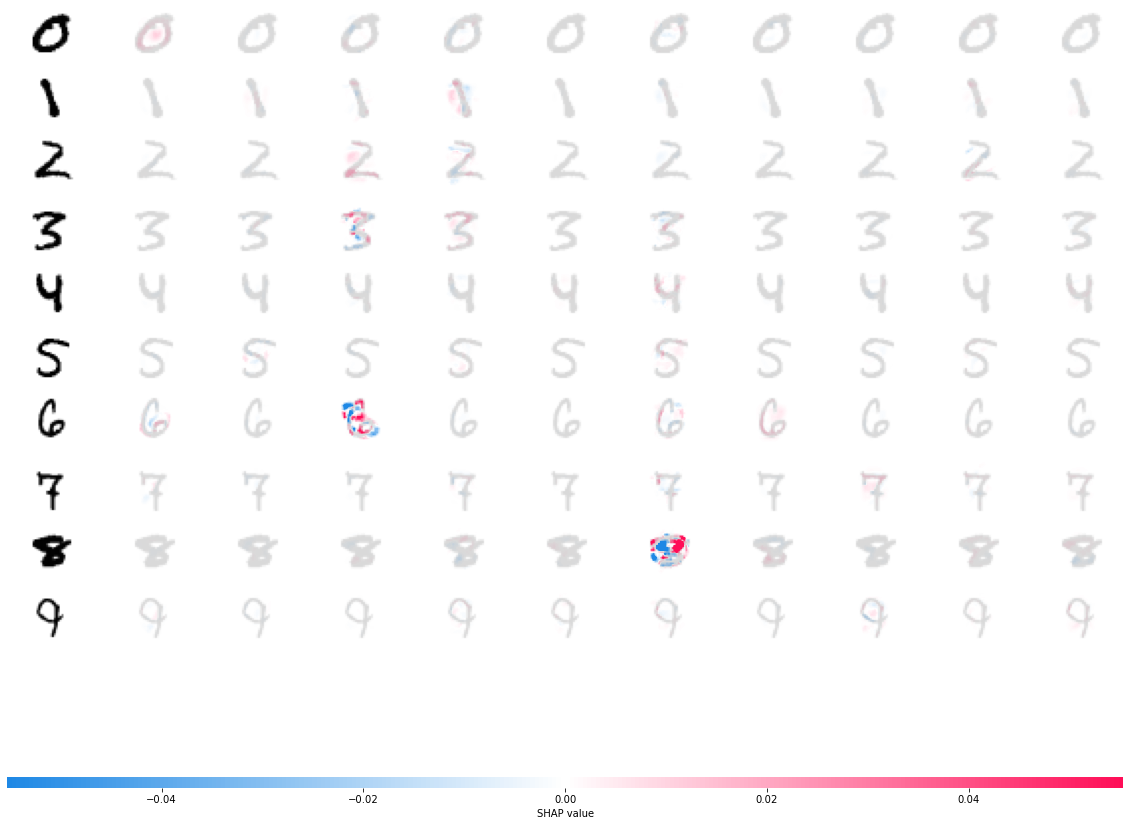

10 10


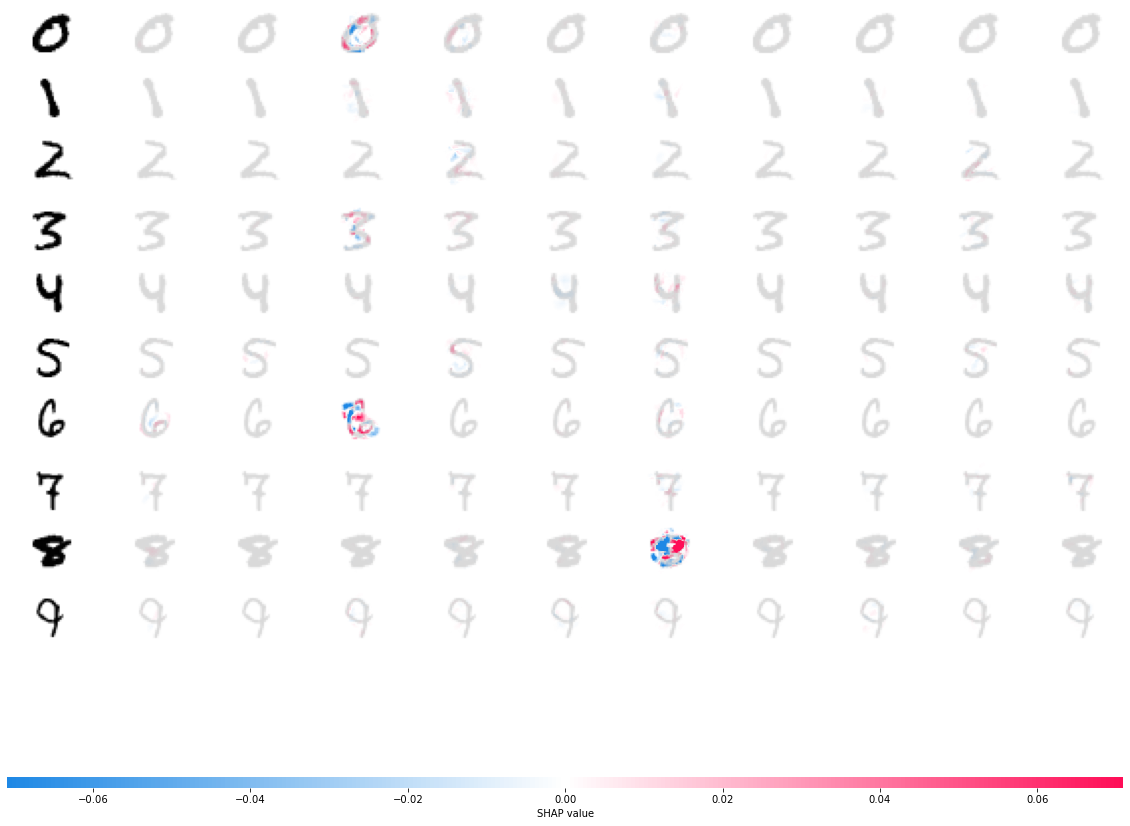

[0.0004680507263401523, 2.850890450645238e-05, 0.00029218909912742674, 8.866457210388035e-05, 3.2257510611088946e-05, 0.00017144844605354592, 0.00024846622545737773, 4.905457535642199e-05, 1.3407544884103118e-05, 4.155290298513137e-05]
[9.311431767855538e-07, -1.8889892317019985e-08, 1.1903466656804085e-08, 6.811622733948752e-05, -0.00014718046122652595, 8.373593374244592e-08, -9.368563041789457e-06, -2.8331785870250314e-05, -2.5492430722806603e-05, -2.721830142604631e-06]
Round 3 finished

Test set: Average loss: 0.0006, Accuracy: 8957/10000 (90%)

Server 4


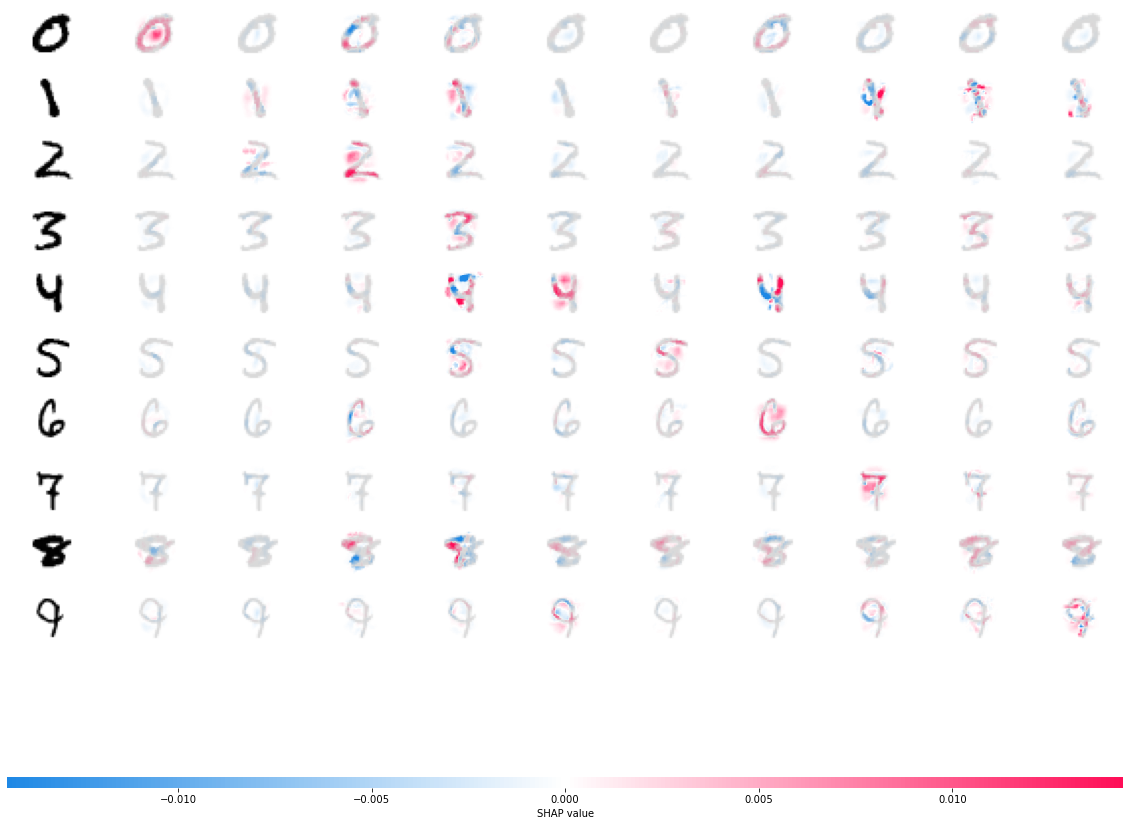

Client Clean 4


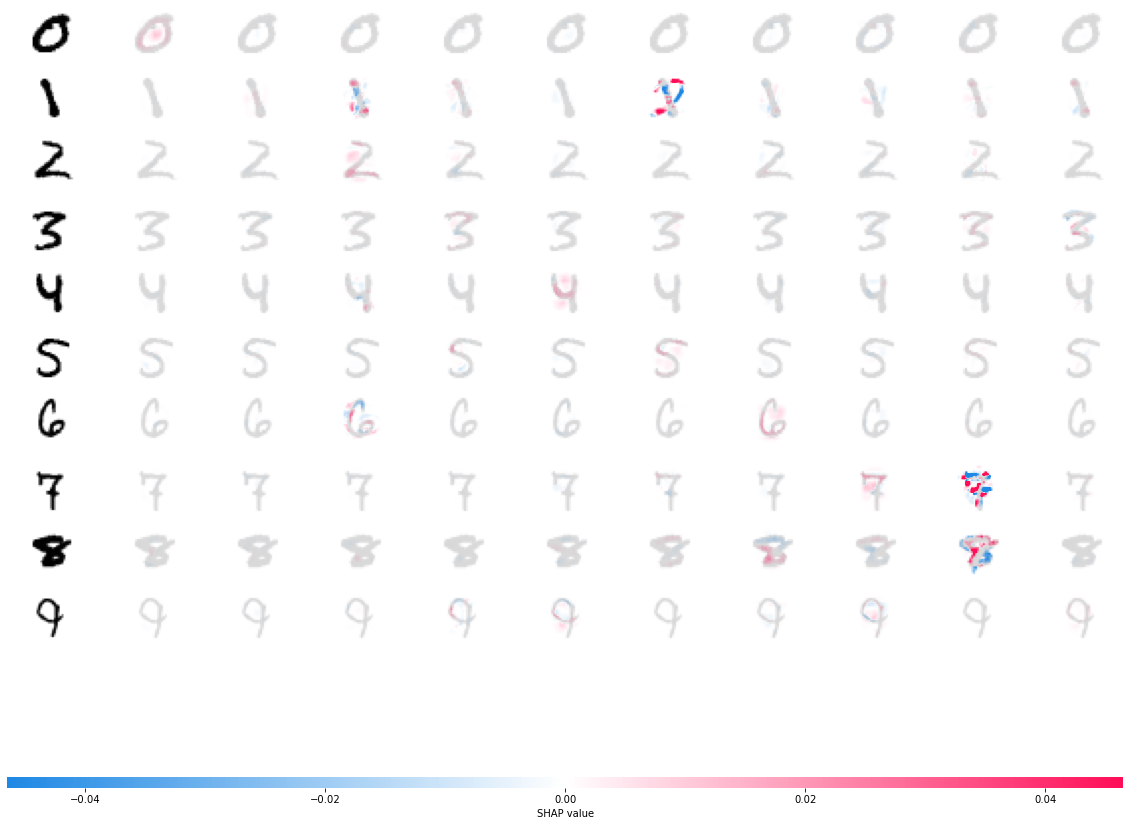

10 10


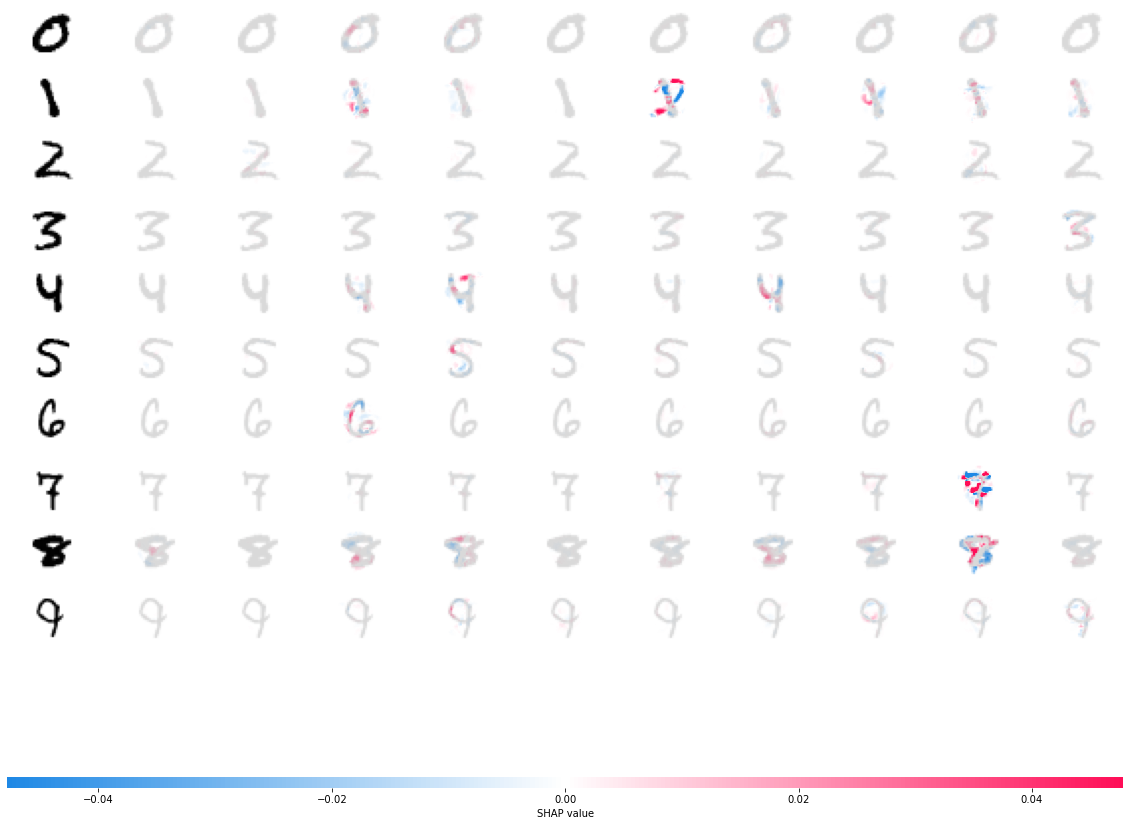

[0.00040176590846385807, 4.3434667531982996e-05, 0.00024241792561952025, 1.797540062398184e-05, 0.00021513048704946414, 0.00014120386185823008, 0.0002689019311219454, 7.66188713896554e-05, 6.030657232258818e-06, 9.490388401900418e-05]
[-9.029171827990012e-07, 5.5803075156291015e-06, 6.337155355140567e-06, -9.82279652816942e-06, 2.3043042347126175e-05, 6.650090654147789e-06, 2.231389680673601e-05, 2.1838795987605408e-05, -5.072145654594351e-07, -8.6197223936324e-06]
Client Poisoned 4


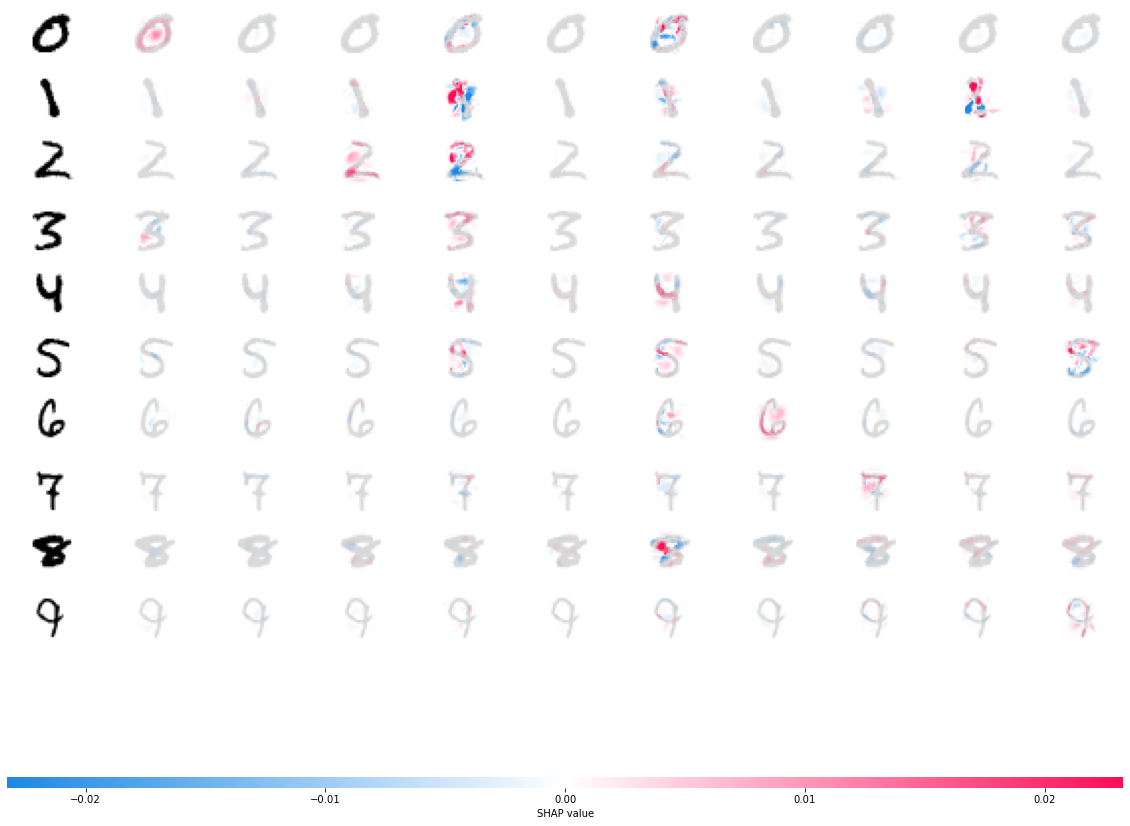

10 10


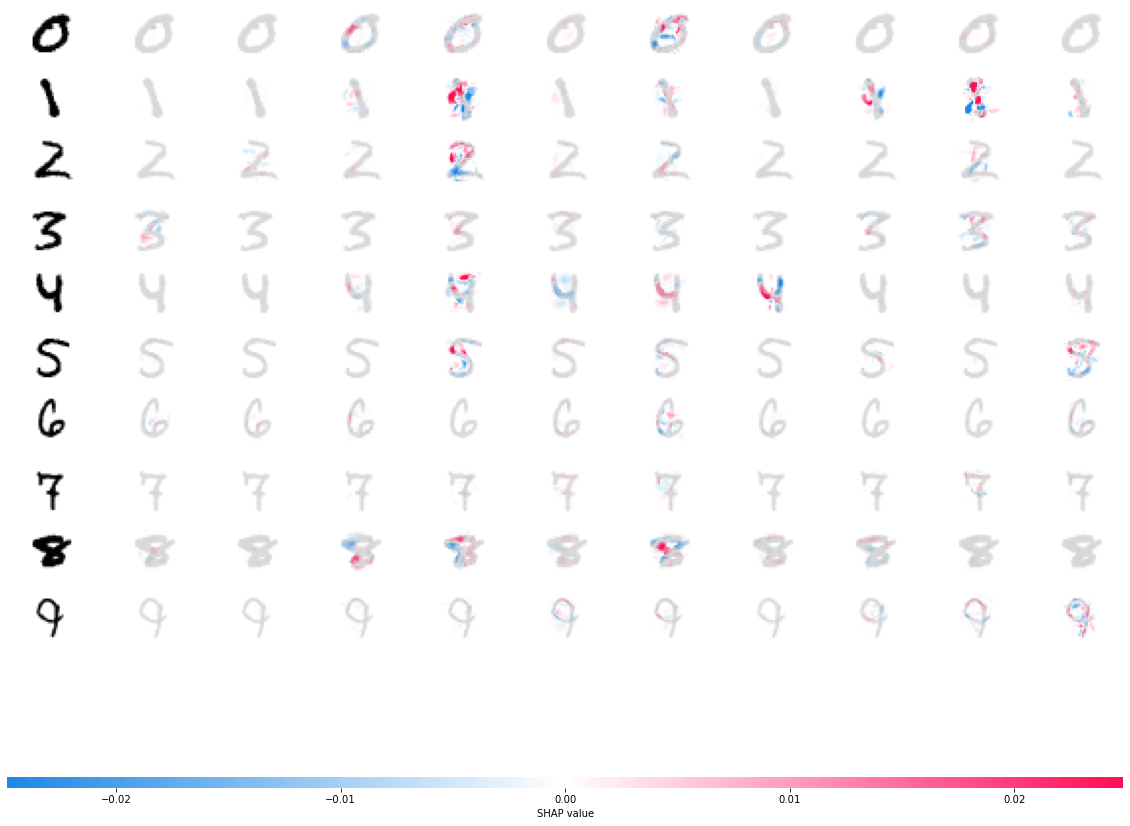

[0.0004885125817963853, 5.764914249084541e-06, 0.00022526511747855693, 0.00015071159577928483, 1.1267374702583766e-05, 5.334882553142961e-05, 0.00026676787820179015, 3.8380709156626835e-05, 1.2511678960436257e-05, 3.1428282454726286e-05]
[4.4957196223549545e-06, -4.9669498366711196e-05, 1.7869824660010636e-06, 6.0061098338337615e-05, -0.00011680188981699757, -4.682234475694713e-07, 1.1461959729786031e-05, -5.3937477787258103e-05, -6.207173697703183e-06, 4.959959767347755e-07]
Round 4 finished

Test set: Average loss: 0.0006, Accuracy: 9052/10000 (91%)

Server 5


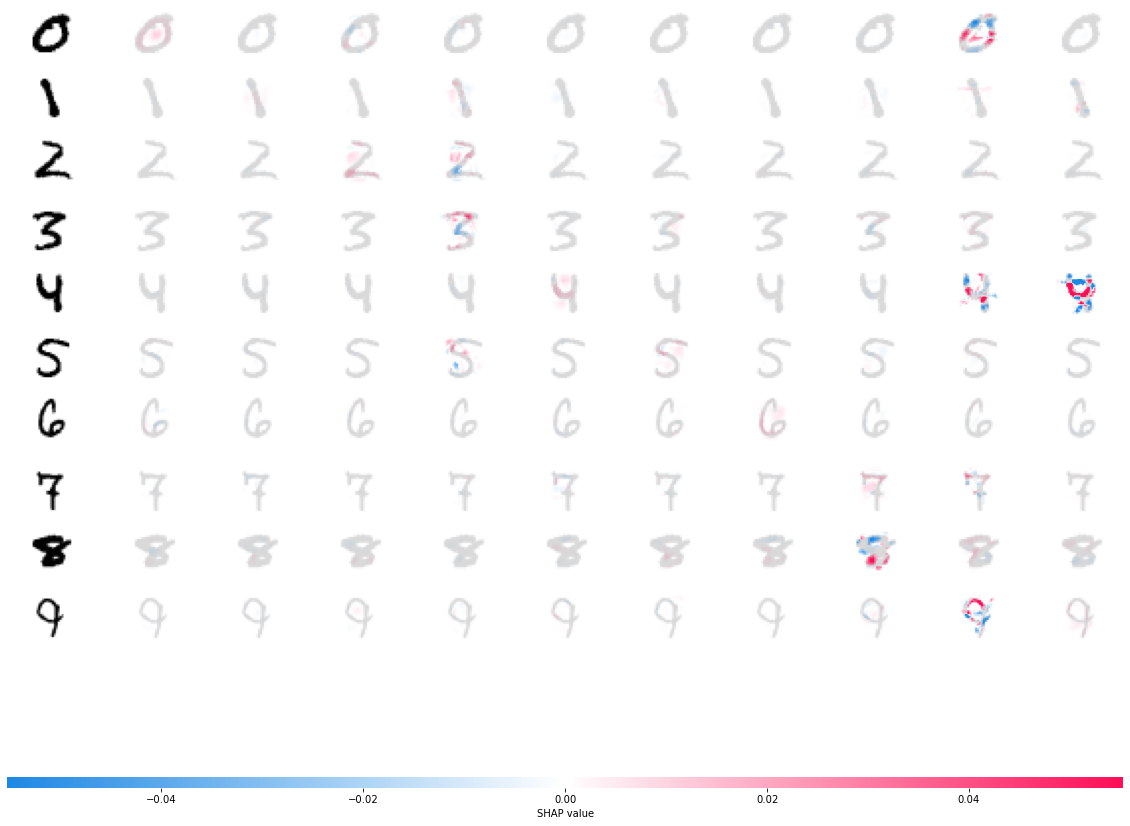

Client Clean 5


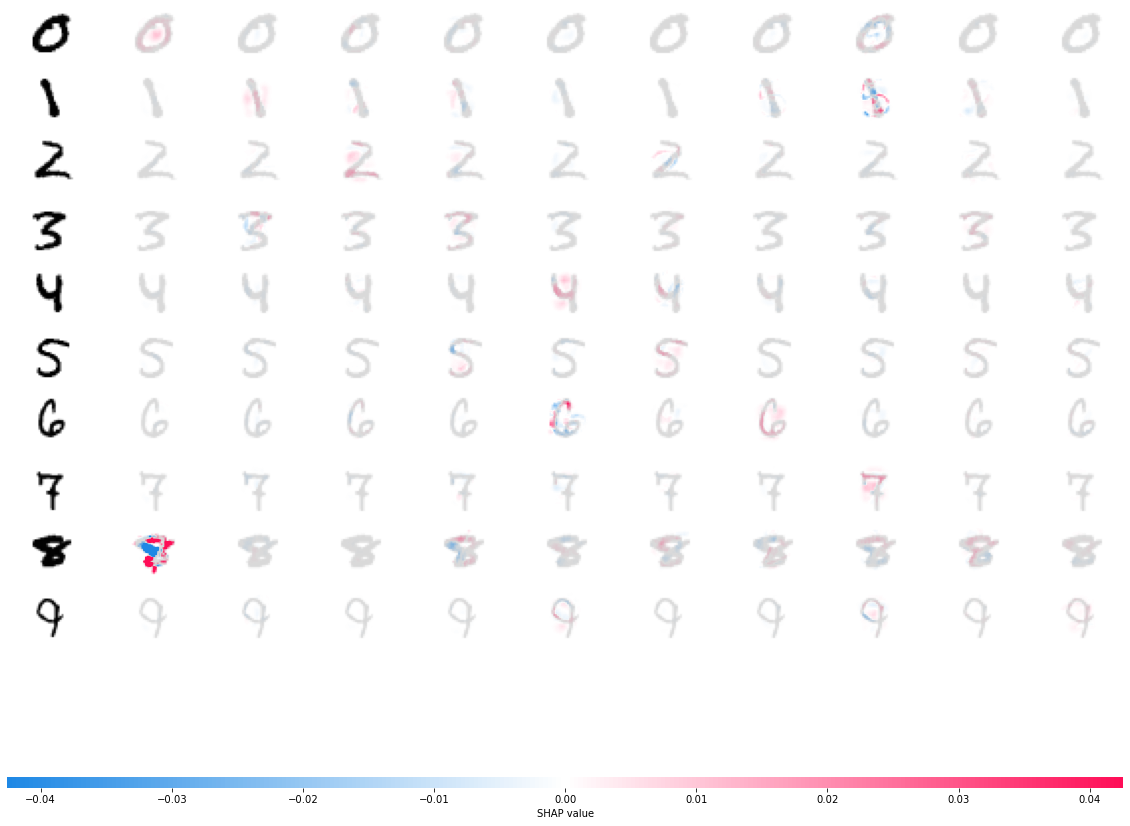

10 10


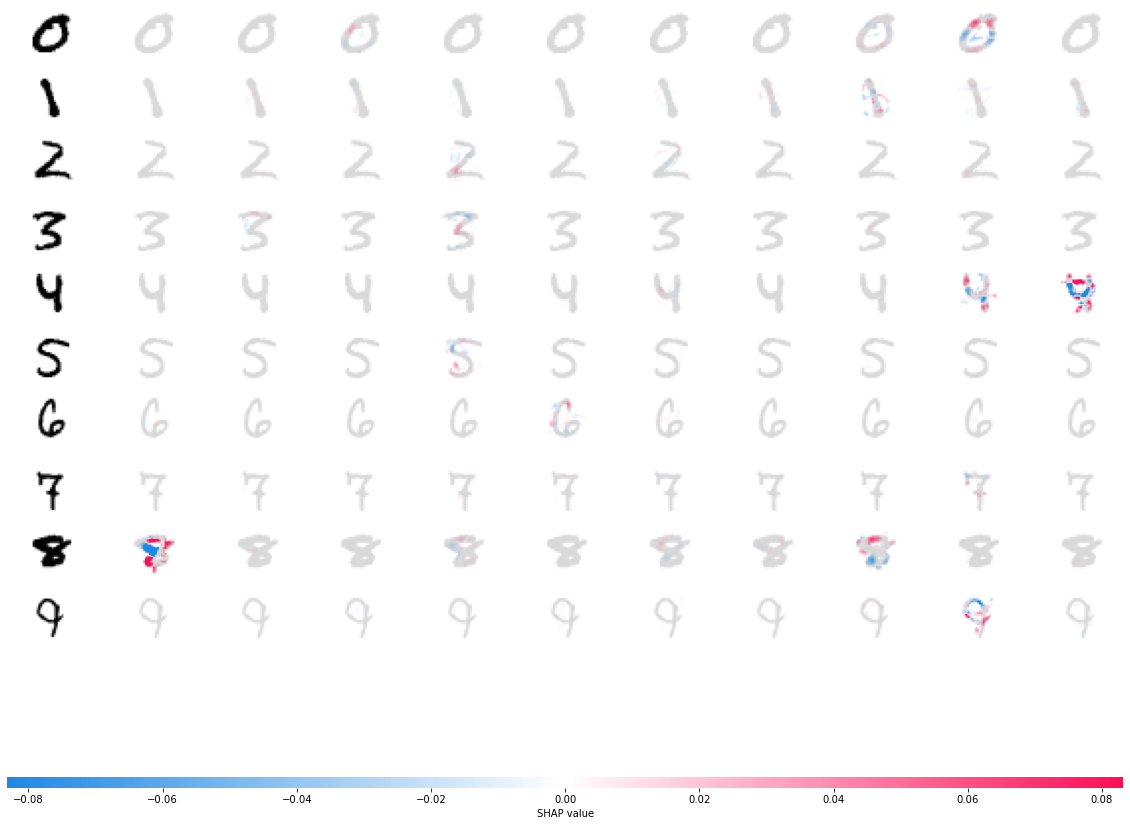

[0.0004639860417228192, 0.00015044166502775624, 0.00018495456606615335, 2.3045300622470677e-05, 0.00017539787950227037, 0.00020370312267914414, 0.0002473609638400376, 0.00010351837408961728, 1.4341895621328149e-05, 0.00020647407654905692]
[-7.780658613398828e-06, 0.00019458893075352535, -1.725835318211466e-06, -6.282767571974546e-06, 4.1617784518166445e-05, 1.033147236739751e-05, 1.576850627316162e-05, 3.914192893716972e-05, 2.2767699192627333e-07, -1.4849748026790621e-06]
Client Poisoned 5


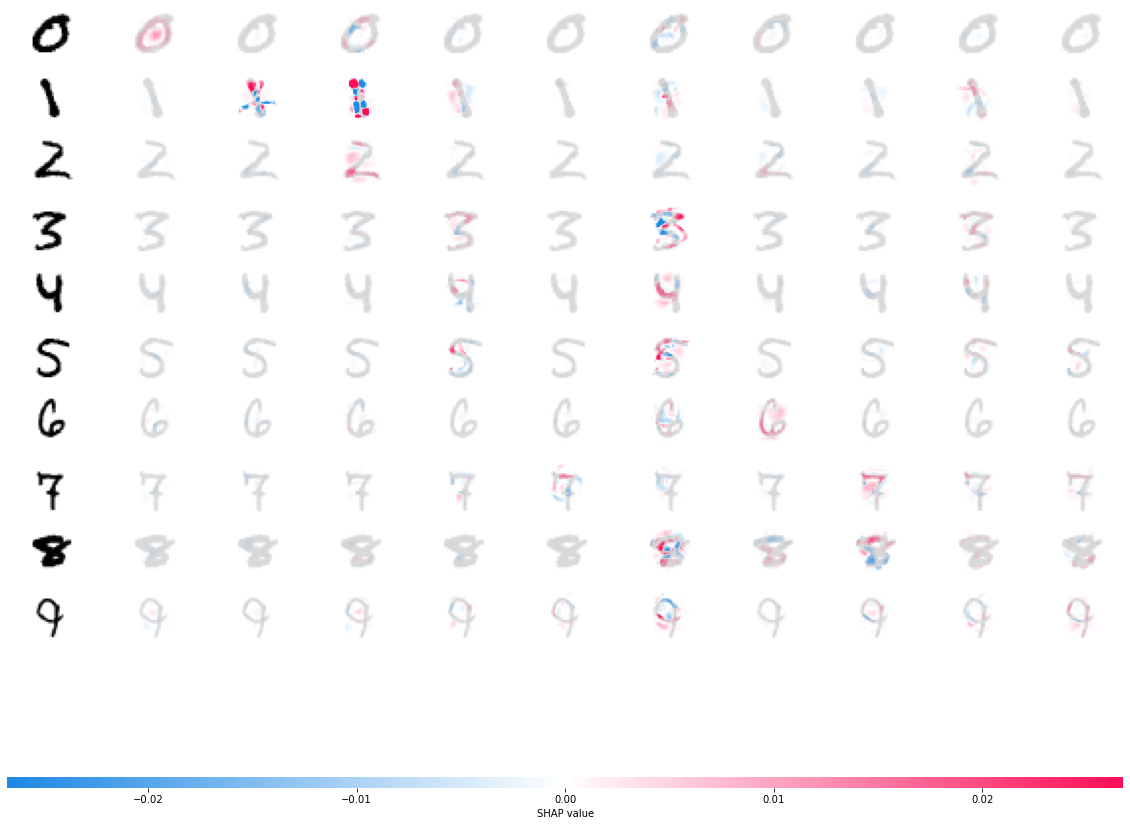

10 10


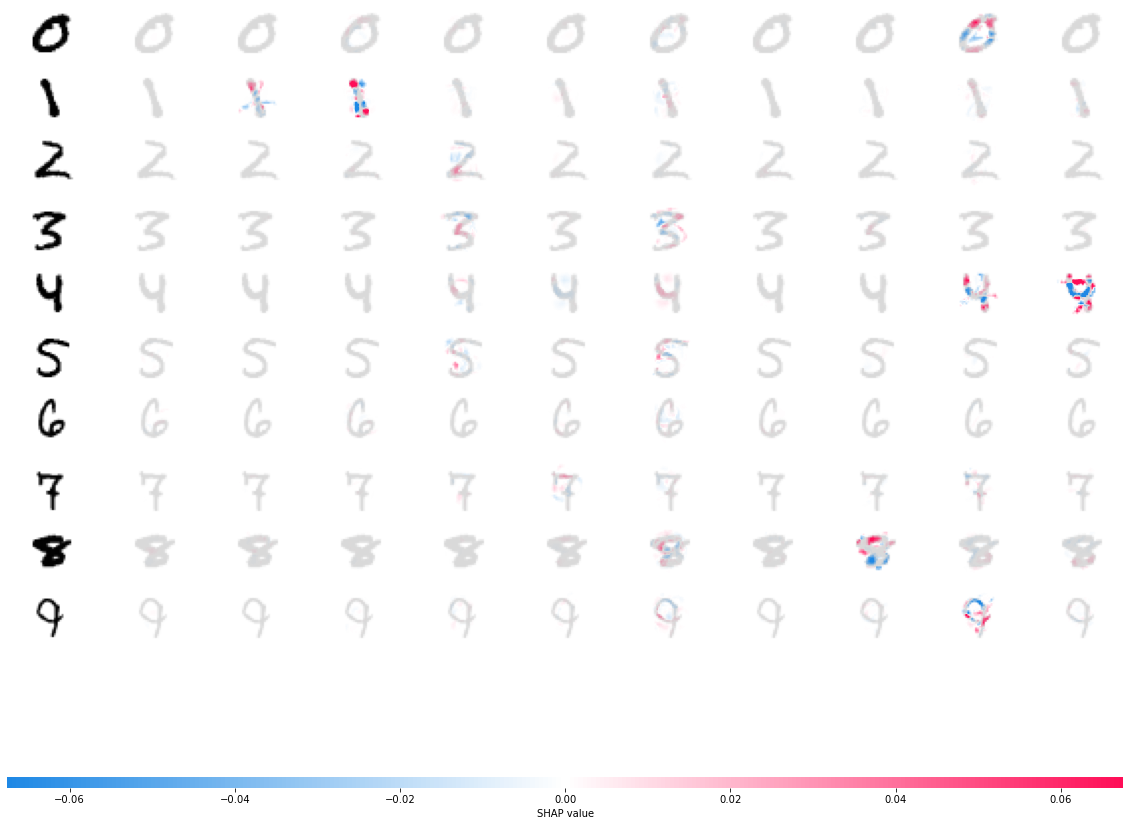

[0.00045520829735323787, 1.6032325220294297e-05, 0.0002524840529076755, 4.4970842282054946e-05, 2.161115116905421e-05, 9.595457231625915e-05, 0.00023407613480230793, 3.881321390508674e-05, 4.4930715375812724e-05, 4.943860949424561e-05]
[4.688554327003658e-06, -1.1949667168664746e-05, 1.3330354704521596e-06, -2.639933427417418e-08, -0.00013046225859625338, 2.3020547246233036e-08, 1.066499817170552e-05, -3.0345050618052483e-05, -5.26034455106128e-06, -6.509137847388047e-06]
Round 5 finished


In [5]:
for i in range(15):
    experiment_util.run_round(client_plane, server, i+1)
for i in range(5):
    experiment_util.run_round(client_plane, server, i+1)
    server.test()
    print("Server {}".format(i+1))
    server_shap = server.get_shap_values()
    visualizer.plot_shap_values(server_shap)
    client_plane.update_clients(server.get_nn_parameters())
    for j in range(1):
        print("Client Clean {}".format(i+1))
        client_plane.clients[clean_idx[j]].train(i+1)
        clean_client_shap = client_plane.clients[clean_idx[j]].get_shap_values()
        visualizer.plot_shap_values(clean_client_shap)
        visualizer.compare_shap_values(clean_client_shap, server_shap)
        diag_mean_values(clean_client_shap,server_shap)
        
    client_plane.update_clients(server.get_nn_parameters())    
    for j in range(1):
        print("Client Poisoned {}".format(i+1))
        client_plane.clients[poisoned_idx[j]].train(i+1)
        poisoned_client_shap = client_plane.clients[poisoned_idx[j]].get_shap_values()
        visualizer.plot_shap_values(poisoned_client_shap)
        visualizer.compare_shap_values(poisoned_client_shap, server_shap)
        diag_mean_values(poisoned_client_shap,server_shap)
    print("Round {} finished".format(i+1))